<img src='https://i.imgur.com/49FNOHj.jpeg' width='50%'>

# Import Statements

In [10]:
import os
import logging
import pandas as pd
import matplotlib.pyplot as plt

# Setup Logging

In [11]:
def setup_logging(cur_f_name: str = '74'):
    logging.basicConfig(
        level=logging.INFO,
        format='%(asctime)s - %(levelname)s - %(funcName)s | %(message)s',
        handlers=[
            # logging.StreamHandler(),
            logging.FileHandler(f'{cur_f_name}.log')
        ]
    )

    logging.info('Logging setup complete for {cur_f_name}')

# Read CSV and return DF

In [12]:
def fetch_df(csv_in: str) -> pd.DataFrame:
    logging.info(f'Fetching DataFrame from {csv_in}')

    try:
        df = pd.read_csv(csv_in, index_col=0)
    except FileNotFoundError as notfound_err:
        logging.error(f'File not found: {csv_in}')
        raise notfound_err
    except pd.errors.EmptyDataError as empty_err:
        logging.error(f'Empty data in file: {csv_in}')
        raise empty_err
    except pd.errors.ParserError as parse_err:
        logging.error(f'Error parsing file: {csv_in}')
        raise parse_err
    except Exception as e:
        logging.error(f'An unexpected error occurred: {e}')
        raise e
    else:
        logging.info(f'DataFrame fetched successfully with {len(df)} rows and {len(df.columns)} columns')
        return df

# Plot a chart

In [13]:
def plot_df(plot_type: str, x_data, y_data, title: str, x_label: str, y_label: str):
    logging.info(f'Initiating plotting chart')

    if len(x_data) != len(y_data):
        logging.error(f'x_data: {x_data} and y_data: {y_data} must be of same length')
        return

    if x_data.empty or y_data.empty:
        logging.warning(f'x_data: {x_data} or y_data: {y_data} is empty')
        return

    try:
        plt.figure(figsize=(15, 10))
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.title(title)
        plt.xlabel(x_label, fontsize=15)
        plt.ylabel(y_label, fontsize=15)

        if plot_type == 'line':
            plt.plot(x_data, y_data, marker='o', color='b')
        elif plot_type == 'scatter':
            plt.scatter(x_data, y_data, marker='o', color='b')
        elif plot_type == 'bar':
            plt.bar(x_data, y_data, color='b')
        else:
            logging.error(f'Unsupported plot type: {plot_type}')
            return

        plt.grid(True)
        plt.tight_layout()
        plt.show()

        logging.info('Plotting complete')
    except Exception as e:
        logging.error(f'Unexpected error: {e}')

# Plot twin x line chart

In [14]:
def plot_twinx_line_chart(x_data, y1_data, y2_data, title:str, x_label: str, y1_label: str, y2_label: str):
    logging.info('Initiating plotting twin-x chart')

    if not (len(x_data) == len(y1_data) == len(y2_data)):
        logging.error(f'x_data: {x_data}, y1_data: {y1_data} and y2_data: {y2_data} must be of same length')
        return

    if any(len(data) == 0 for data in [x_data, y1_data, y2_data]):
        logging.warning(f'One or more data inputs are empty. x_data: {x_data}, y1_data: {y1_data}, y2_data: {y2_data}')
        return

    try:
        fig, ax1 = plt.subplots(figsize=(15, 10))
        ax2 = ax1.twinx()

        ax1.plot(x_data, y1_data, color='g', marker='o', label=y1_label)
        ax2.plot(x_data, y2_data, color='b', marker='o', label=y2_label)

        ax1.set_xlabel(x_label, fontsize=15)
        ax1.set_ylabel(y1_label, fontsize=15)
        ax2.set_ylabel(y2_label, fontsize=15)
        ax1.set_title(title, fontsize=18)

        ax1.tick_params(axis='x', labelsize=10)
        ax1.tick_params(axis='y', labelsize=10)
        ax2.tick_params(axis='y', labelsize=10)
        ax1.grid(True)

        plt.tight_layout()
        plt.show()

        logging.info('Plotting complete')
    except Exception as e:
        logging.error(f'Unexpected error: {e}')

# Data Exploration with colors

In [15]:
if __name__ == '__main__':
    setup_logging()
    
    color_df = fetch_df('data/colors.csv')
    
    print(f'Unique colors: {color_df.name.nunique()}')
    print(f'Number of transparent colors: {color_df.is_trans.value_counts()}')
    

Unique colors: 135
Number of transparent colors: is_trans
f    107
t     28
Name: count, dtype: int64


# Find the oldest and largest Lego sets

In [16]:
if __name__ == '__main__':
    setup_logging('74')

    sets_df = fetch_df('data/sets.csv')
    print(f'First year set details:\n{sets_df[sets_df.year == sets_df.year.min()]}')
    print(f'Top 5 sets with most number of parts: {sets_df.sort_values(by="num_parts", ascending=False).head(5)}')


First year set details:
                                      name  year  theme_id  num_parts
set_num                                                              
700.1-1         Extra-Large Gift Set (ABB)  1949       365        142
700.2-1               Large Gift Set (ABB)  1949       365        178
700.3-1              Medium Gift Set (ABB)  1949       365        142
700.A-1              Small Brick Set (ABB)  1949       371         24
700.B-1  Small Doors and Windows Set (ABB)  1949       371         12
Top 5 sets with most number of parts:                                    name  year  theme_id  num_parts
set_num                                                           
BIGBOX-1  The Ultimate Battle for Chima  2015       571       9987
75192-1           UCS Millennium Falcon  2017       171       7541
71043-1                 Hogwarts Castle  2018       246       6020
10256-1                       Taj Mahal  2017       673       5923
10189-1                       Taj Mahal  2008 

# Year wise plot

Earliest 5 sets release:
      set_num
year         
1949        5
1950        6
1953        4
1954       14
1955       28
Latest 5 sets release:
      set_num
year         
2017      786
2018      816
2019      840
2020      674
2021        3


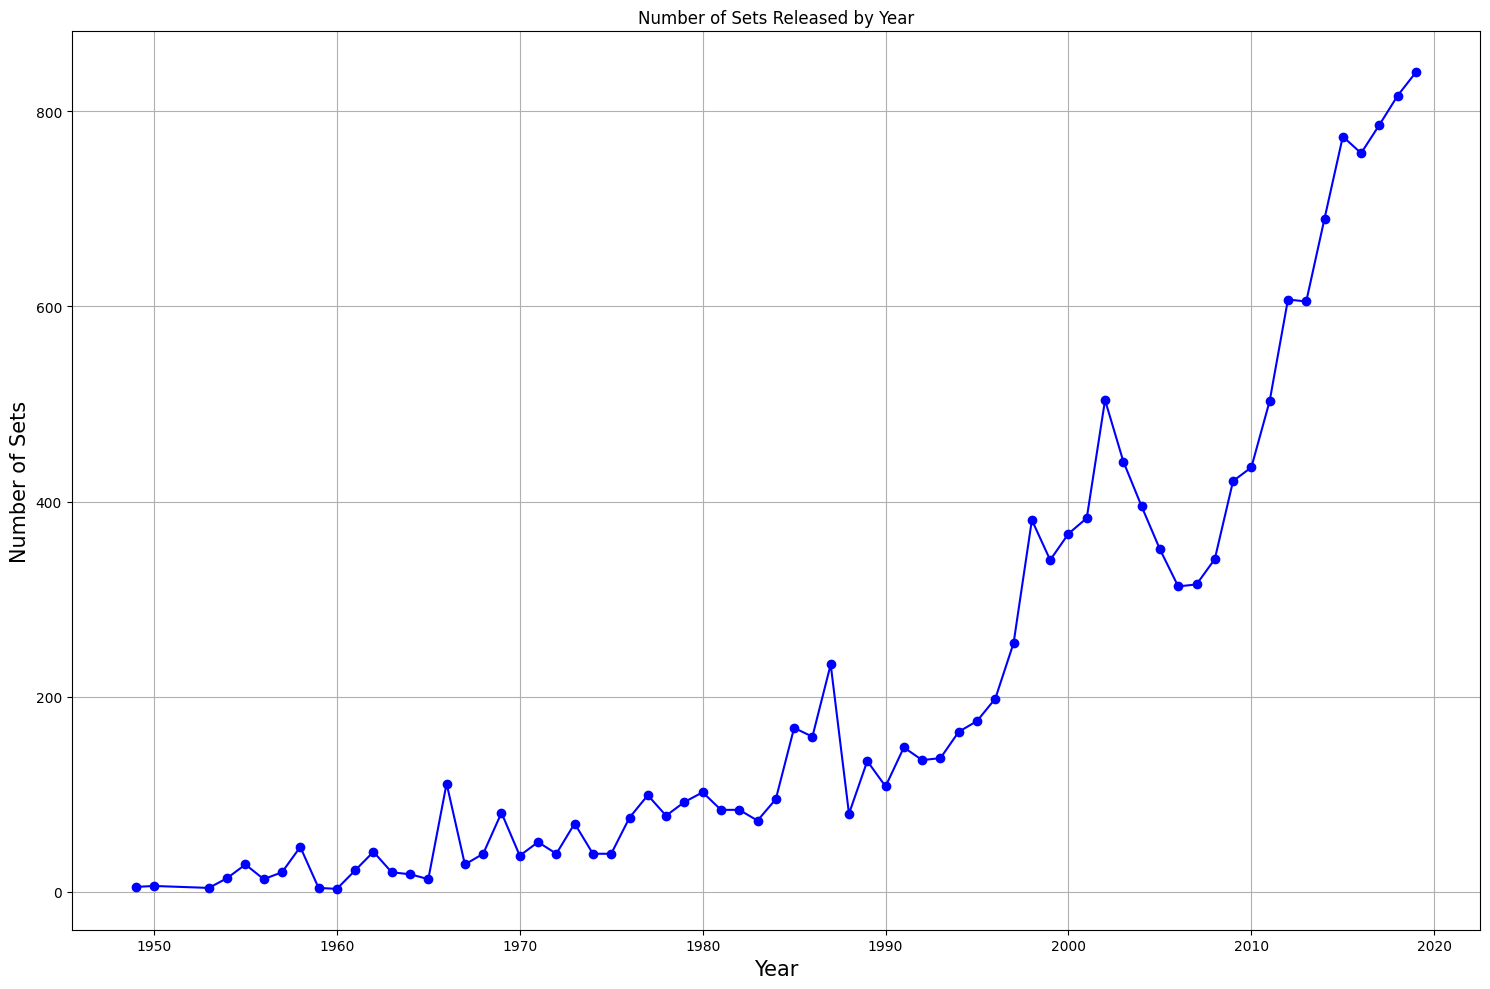

In [17]:
if __name__ == '__main__':
    setup_logging('74')

    sets_df = fetch_df('data/sets.csv')
    sets_df = sets_df.reset_index()
    
    sets_by_yr = sets_df.groupby('year')[['set_num']].count().sort_values(by='year', ascending=True)
    print(f'Earliest 5 sets release:\n{sets_by_yr.head(5)}')
    print(f'Latest 5 sets release:\n{sets_by_yr.tail(5)}')

    plot_df('line', sets_by_yr.index[:-2], sets_by_yr.set_num[:-2],
             'Number of Sets Released by Year',
             'Year', 'Number of Sets')



# Themes by Year

Earliest 5 themes release:
      num_themes
year            
1949           2
1950           1
1953           2
1954           2
1955           4
Latest 5 themes release:
      num_themes
year            
2017          89
2018          93
2019          78
2020          82
2021           1


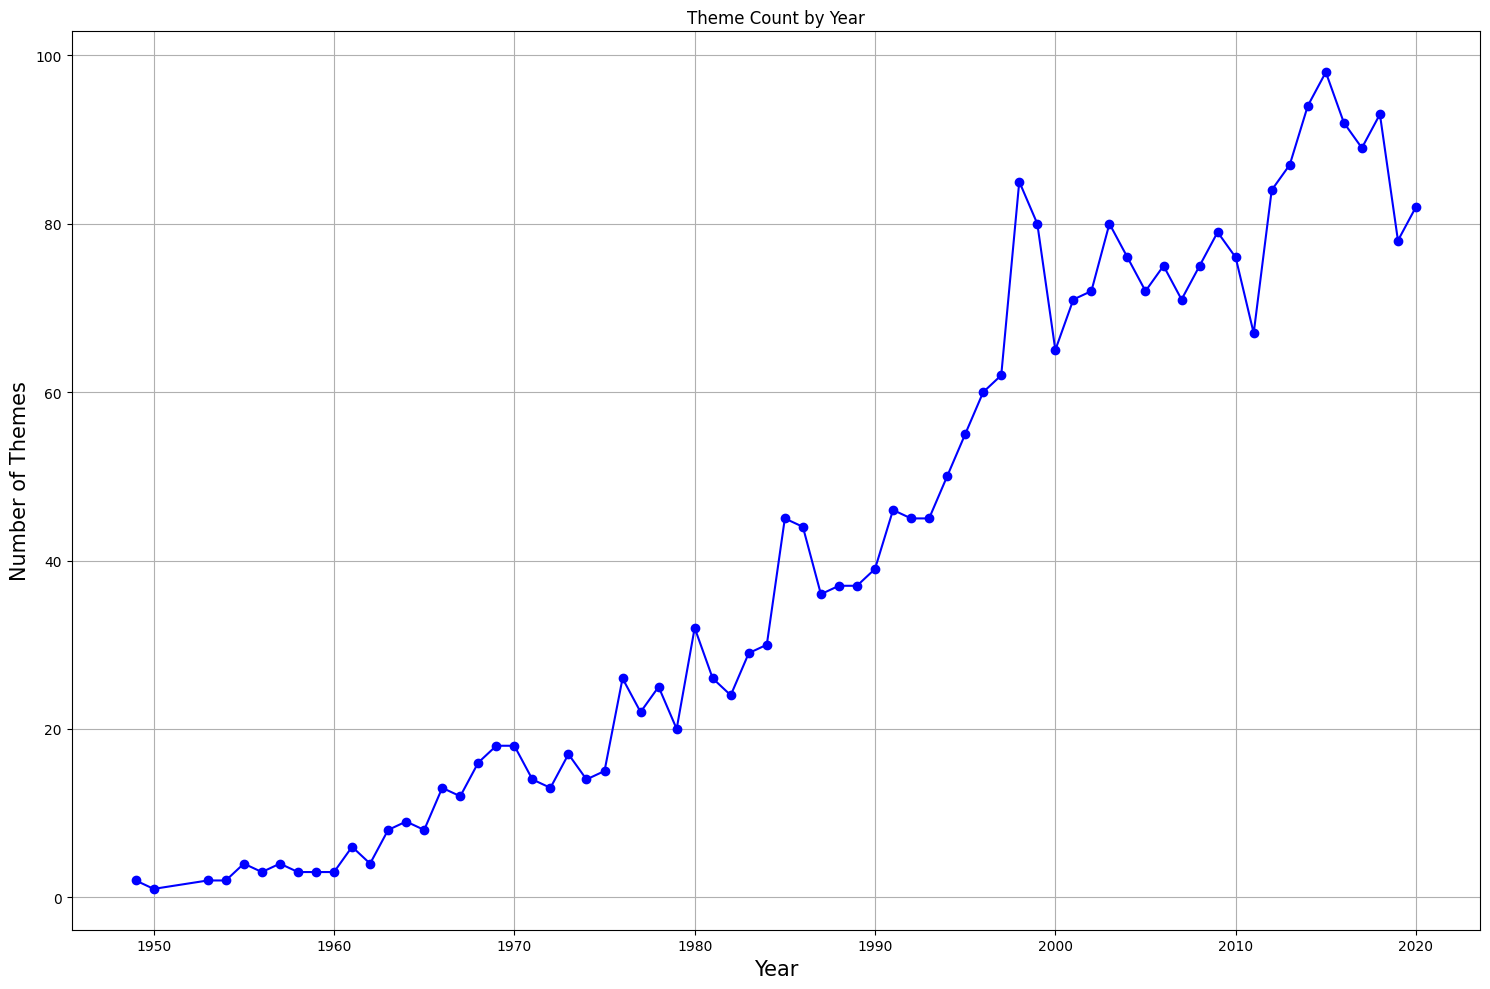

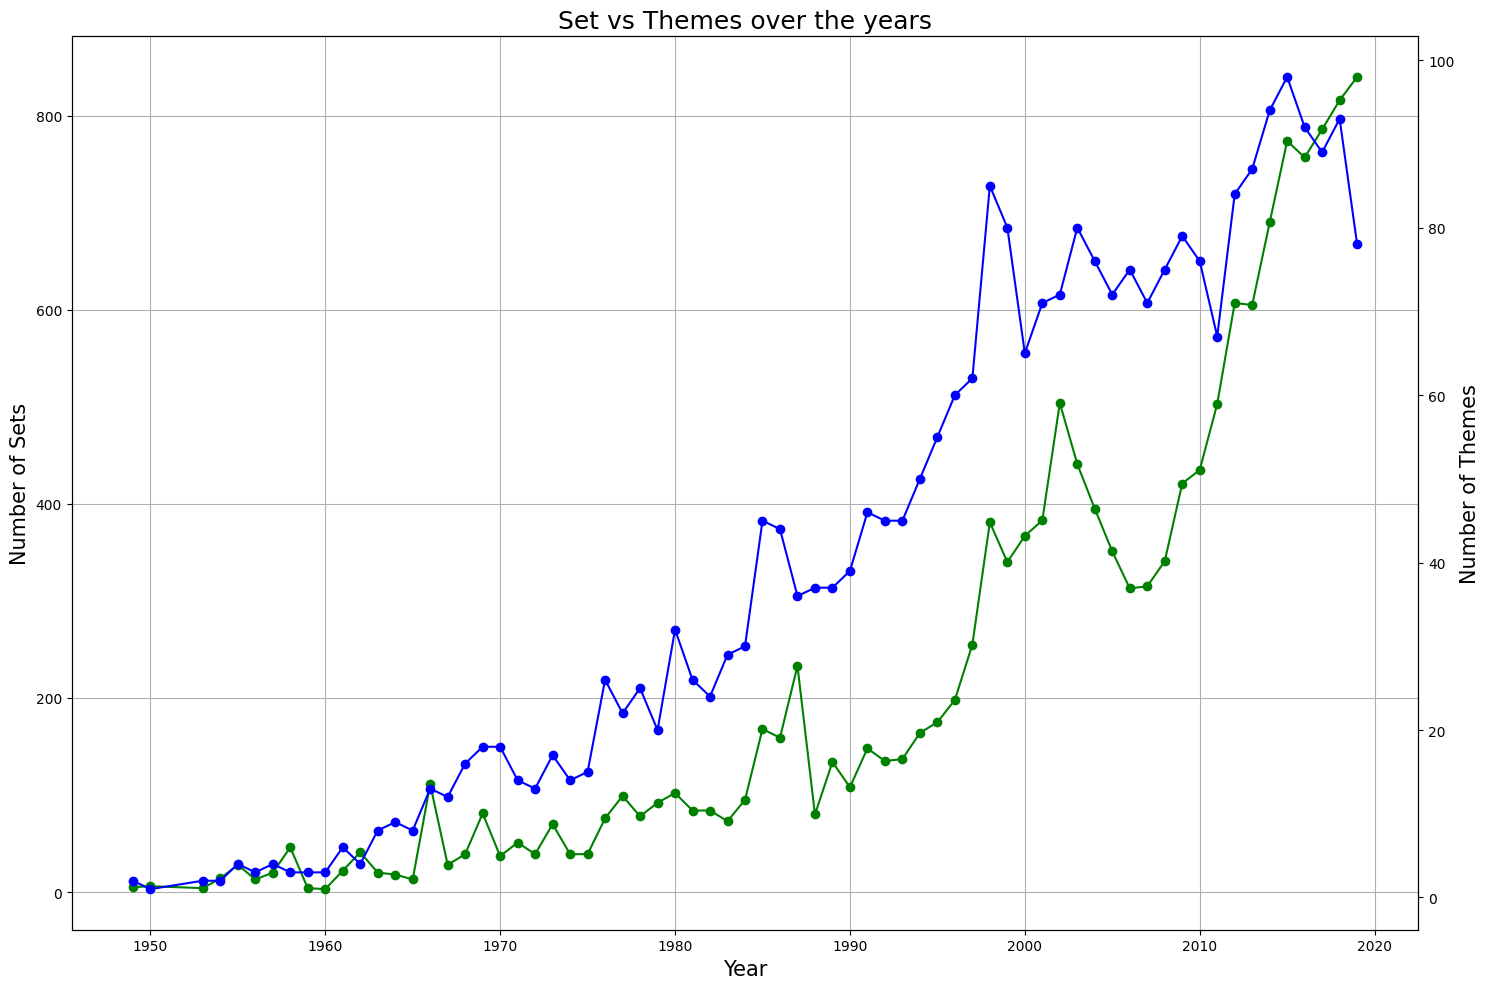

In [18]:
if __name__ == '__main__':
    setup_logging('74')

    sets_df = fetch_df('data/sets.csv')
    sets_df = sets_df.reset_index()

    themes_by_yr = sets_df.groupby('year').aggregate({'theme_id': pd.Series.nunique,})
    themes_by_yr = themes_by_yr.rename(columns={'theme_id': 'num_themes'})
    print(f'Earliest 5 themes release:\n{themes_by_yr.head(5)}')
    print(f'Latest 5 themes release:\n{themes_by_yr.tail(5)}')

    plot_df(
        plot_type='line',
        x_data=themes_by_yr.index[:-1], 
        y_data=themes_by_yr.num_themes[:-1],
        title='Theme Count by Year',
        x_label='Year',
        y_label='Number of Themes'
    )

    plot_twinx_line_chart(
        x_data=sets_by_yr.index[:-2],
        y1_data=sets_by_yr.set_num[:-2],
        y2_data=themes_by_yr.num_themes[:-2],
        title='Set vs Themes over the years',
        x_label='Year',
        y1_label='Number of Sets',
        y2_label='Number of Themes'
    )

# Scatter plot for parts per set over the years

In [ ]:
if __name__ == '__main__':
    setup_logging('74')

    sets_df = fetch_df('data/sets.csv')
    sets_df = sets_df.reset_index()
    